In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

## BED Data

In [2]:
dfs = {}
path = 'bed_data'

for file_name in os.listdir(path):
    file_path = os.path.join(path, file_name)
    id = file_name.split('_')[0]
    dfs[id] = pd.read_csv(file_path, on_bad_lines = 'warn', delim_whitespace = True)

### Checking Strand Orientation Imbalance

In [3]:
for key in dfs.keys():
    pos = dfs[key]['Strand'].value_counts()['+']
    neg = dfs[key]['Strand'].value_counts()['-']
    print(f'{key}:\t {pos / (pos + neg)}')

pig:	 0.5062994548220053
cat:	 0.4935568126957404
mouse:	 0.500697020368291
dog:	 0.4908785224962987
chicken:	 0.5009921565514803
human:	 0.5049493748910904
rat:	 0.49846090703878515
rabbit:	 0.5017901927138332
sheep:	 0.5157783151107374
macaca:	 0.5036010379575081


### 10 Most Popular Starting Strands

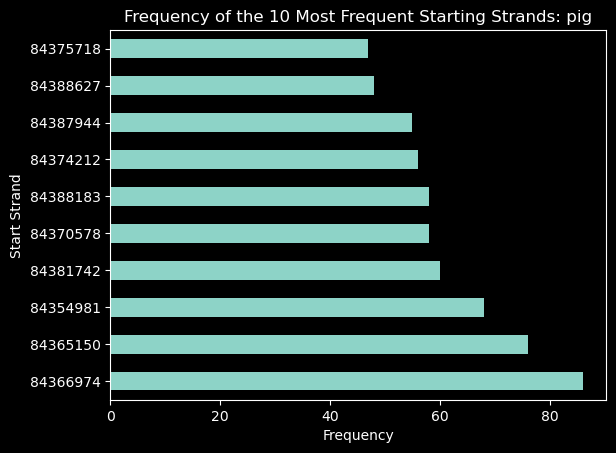

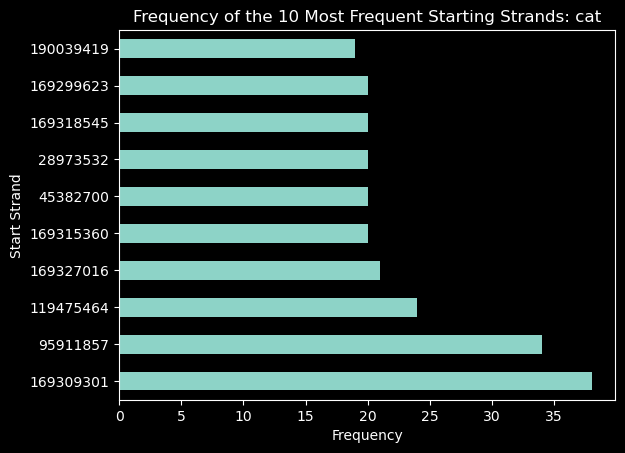

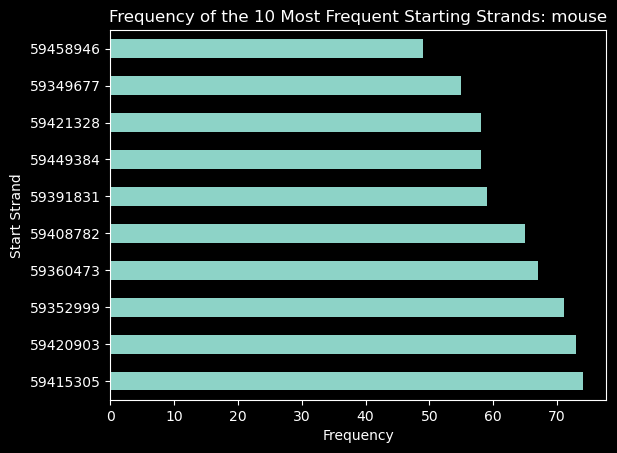

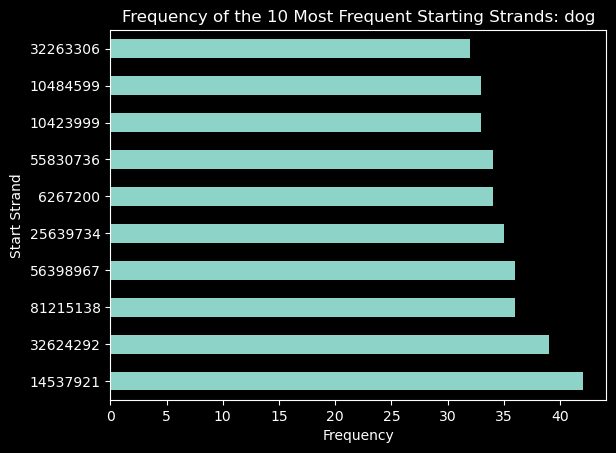

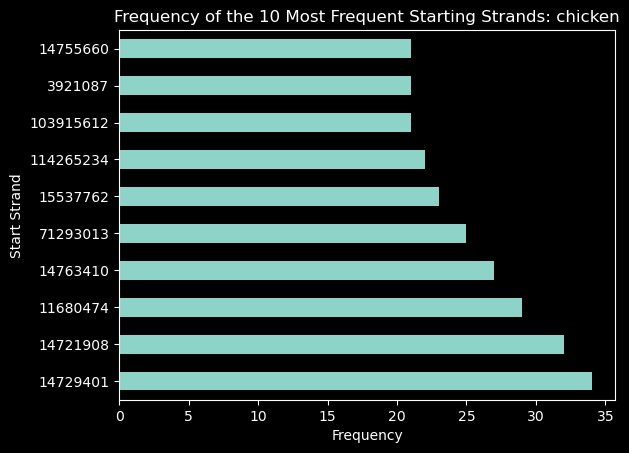

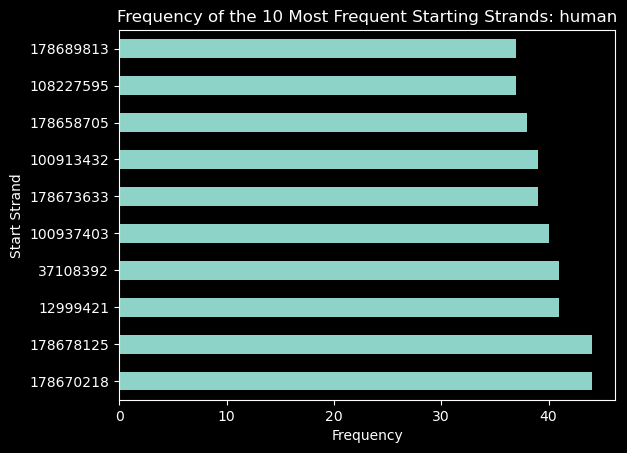

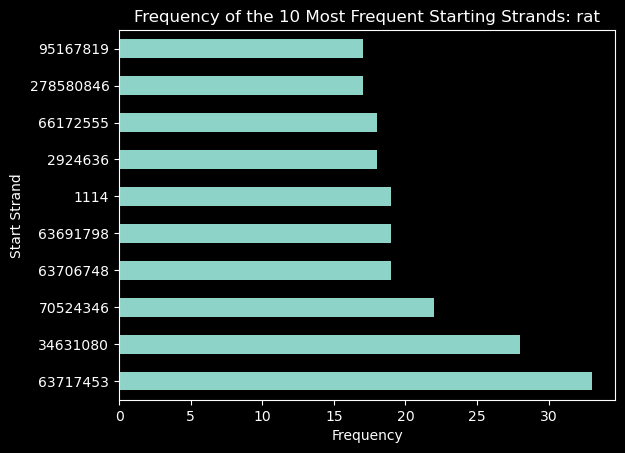

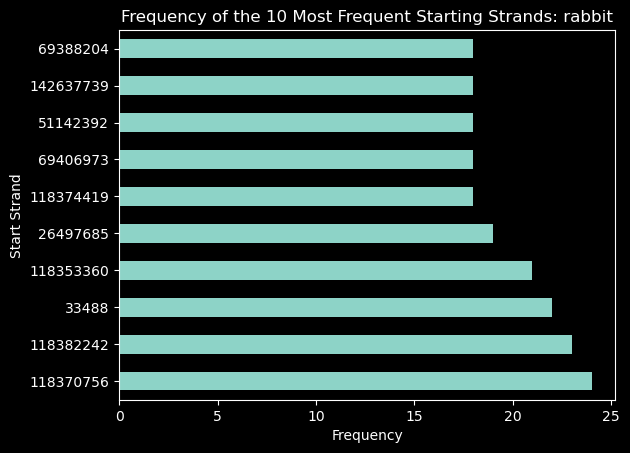

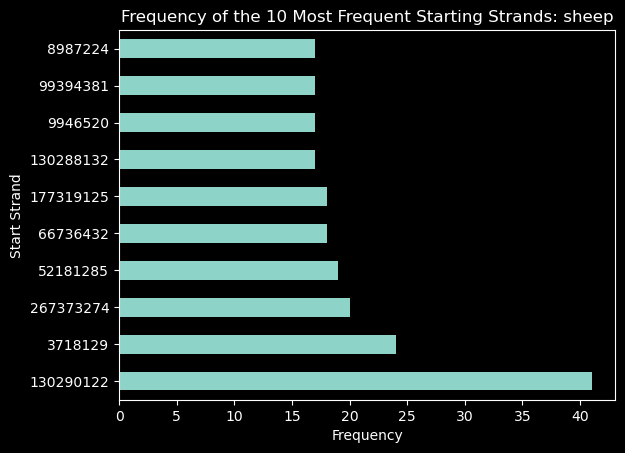

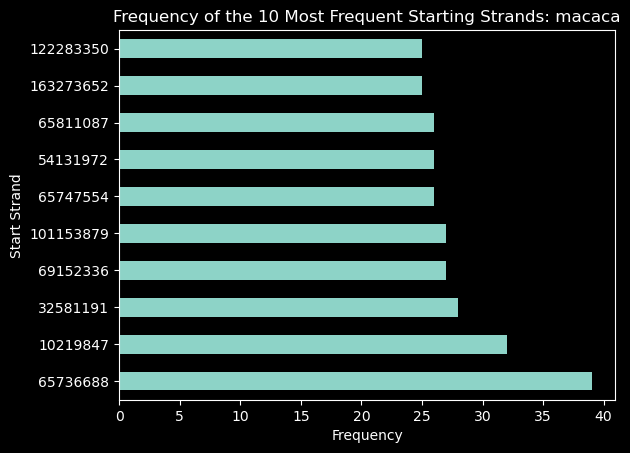

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt

for key in dfs.keys():
    dfs[key]['Start'].value_counts()[:10].plot(kind = 'barh')
    plt.ylabel("Start Strand")
    plt.xlabel("Frequency")
    plt.title(f"Frequency of the 10 Most Frequent Starting Strands: {key}")
    plt.figure()

### 10 Most Popular Ending Strands

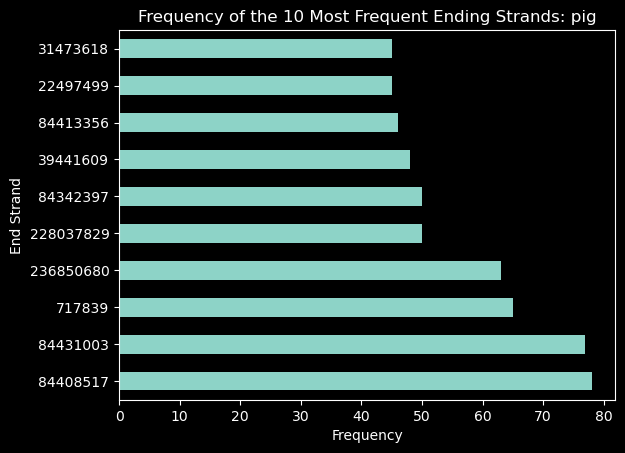

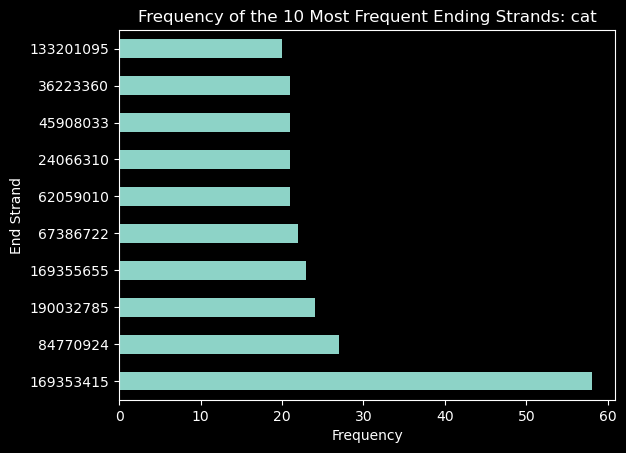

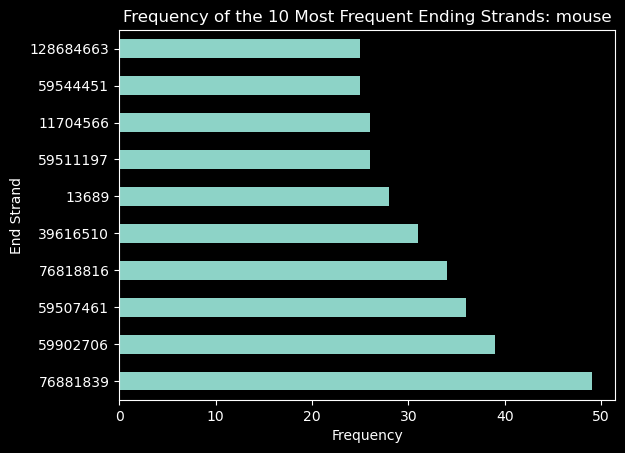

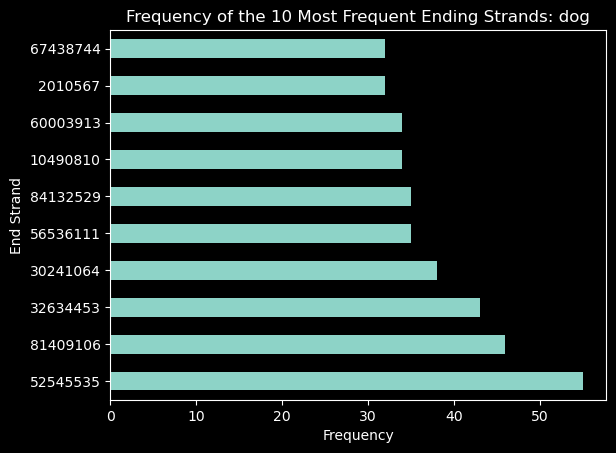

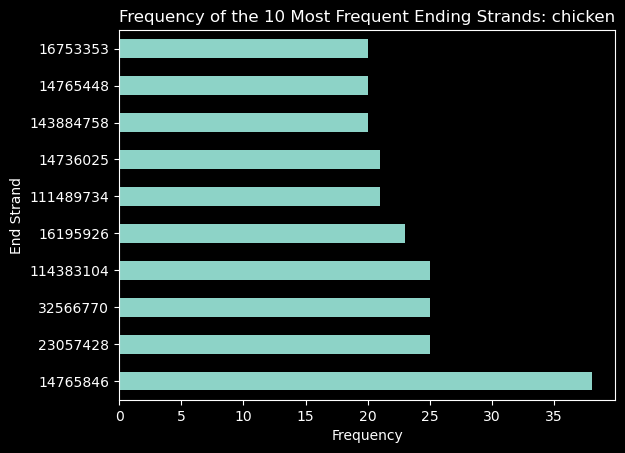

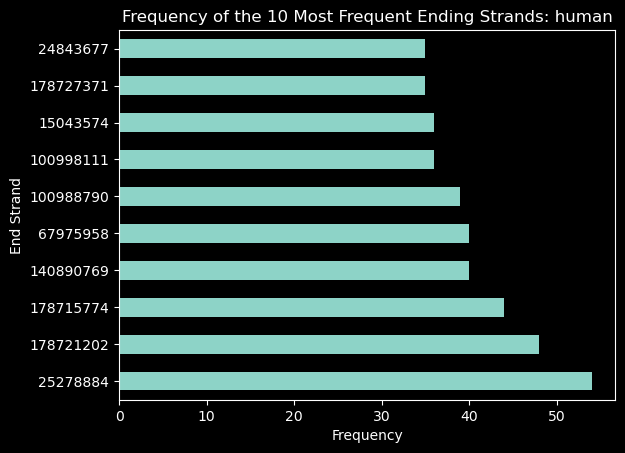

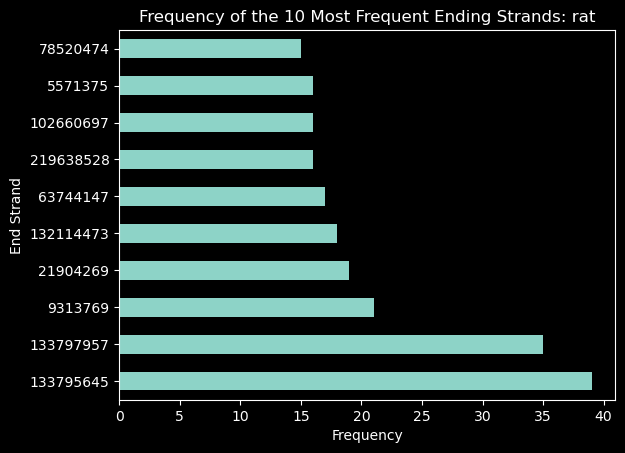

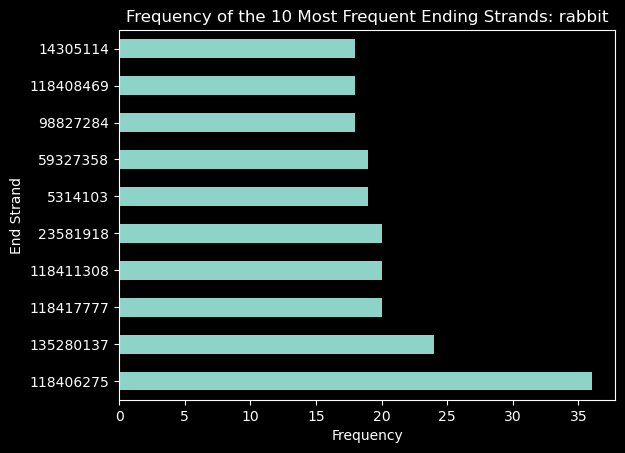

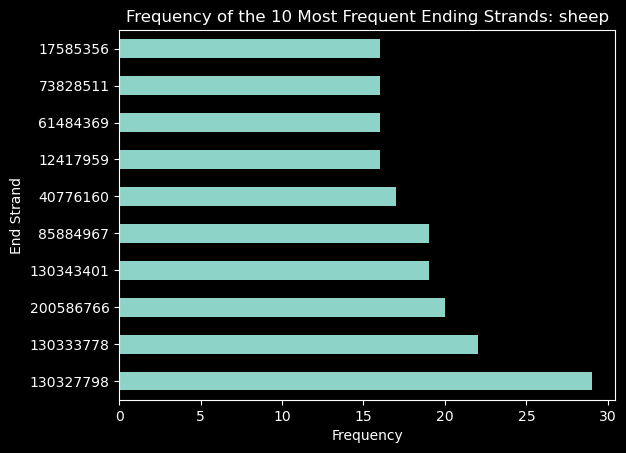

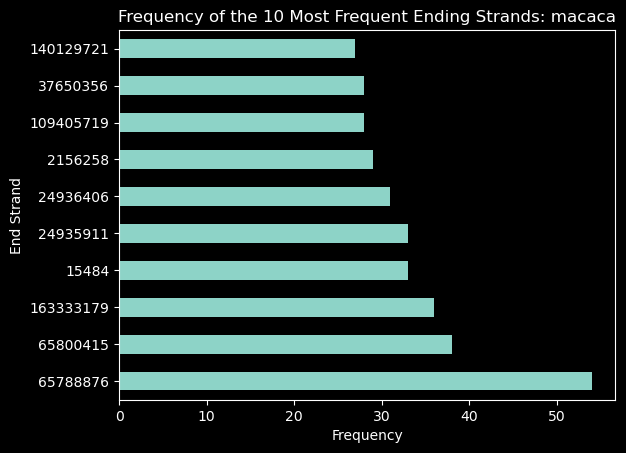

<Figure size 640x480 with 0 Axes>

In [5]:
for key in dfs.keys():
    dfs[key]['End'].value_counts()[:10].plot(kind = 'barh')
    plt.ylabel("End Strand")
    plt.xlabel("Frequency")
    plt.title(f"Frequency of the 10 Most Frequent Ending Strands: {key}")
    plt.figure()

### Checking Correlation between 10 Most Popular Starting Strands and Orientation

In [6]:
for key in dfs.keys():
    top_end_positions = dfs[key]['Start'].value_counts()[:10].index
    dfs[key]['strand_numeric'] = dfs[key]['Strand'].apply(lambda x:1 if x == '+' else -1)
    filtered_df = dfs[key][dfs[key]['Start'].isin(top_end_positions)]
    try:
        pos = filtered_df['Strand'].value_counts()['+']
    except KeyError:
        pos = 0
    neg = filtered_df['Strand'].value_counts()['-']
    print(f'{key}:\t {pos / (pos + neg)}')

pig:	 0.0
cat:	 0.4110169491525424
mouse:	 0.0
dog:	 0.4943502824858757
chicken:	 0.8274509803921568
human:	 0.495
rat:	 0.49047619047619045
rabbit:	 0.3869346733668342
sheep:	 0.8317307692307693
macaca:	 0.5836298932384342


### Checking Correlation between 10 Most Popular Ending Strands and Orientation

In [7]:
for key in dfs.keys():
    top_end_positions = dfs[key]['End'].value_counts()[:10].index
    dfs[key]['strand_numeric'] = dfs[key]['Strand'].apply(lambda x:1 if x == '+' else -1)
    filtered_df = dfs[key][dfs[key]['End'].isin(top_end_positions)]
    pos = filtered_df['Strand'].value_counts()['+']
    neg = filtered_df['Strand'].value_counts()['-']
    print(f'{key}:\t {pos / (pos + neg)}')

pig:	 0.19929453262786595
cat:	 0.3333333333333333
mouse:	 0.1786833855799373
dog:	 0.08854166666666667
chicken:	 0.4369747899159664
human:	 0.5012285012285013
rat:	 0.49528301886792453
rabbit:	 0.19811320754716982
sheep:	 0.3684210526315789
macaca:	 0.3827893175074184


In [8]:
import itertools

combinations = itertools.combinations(dfs.keys(), 2)
species = list(dfs.keys())

### Confusion Matrix for Shared Starting Strands Among all 10 Species

In [9]:
shared_results = {}
for species1, species2 in itertools.combinations(dfs.keys(), 2):
    set1 = set(dfs[species1]['Start'])
    set2 = set(dfs[species2]['Start'])
    shared_seqs = set1 & set2
    count = len(shared_seqs)
    shared_results[(species1, species2)] = count

<Axes: title={'center': 'Confusion Matrix of Shared circRNA Starting Strands for All 10 Species'}>

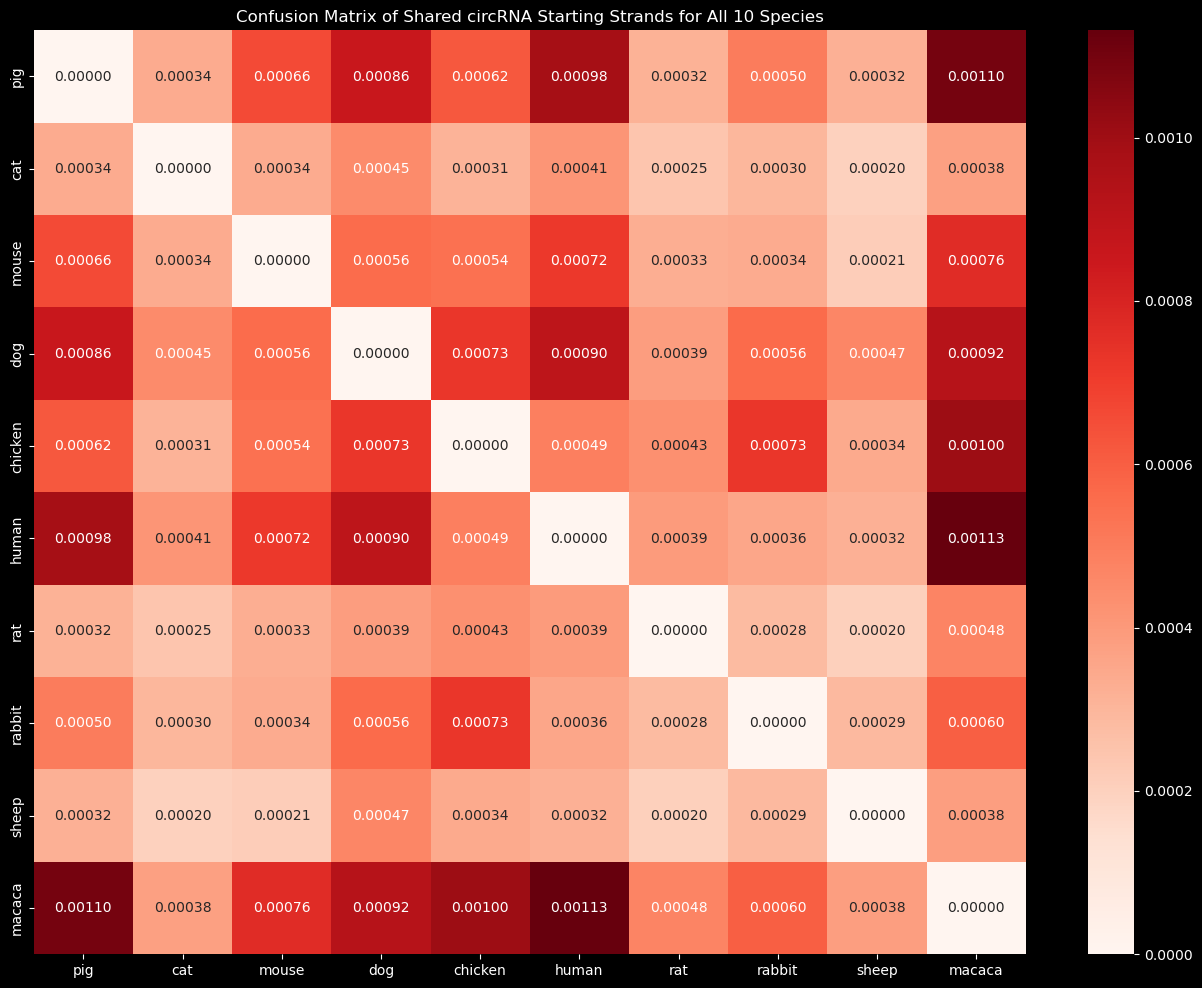

In [11]:
import numpy as np
import seaborn as sns

conf_mtx = pd.DataFrame(np.zeros((len(species), len(species)), dtype = int), index = species, columns = species)

for (species1, species2), count in shared_results.items():
    conf_mtx.loc[species1, species2] = count / (len(set(dfs[species1]['Start'])) + len(set(dfs[species2]['Start'])))
    conf_mtx.loc[species2, species1] = count / (len(set(dfs[species1]['Start'])) + len(set(dfs[species2]['Start'])))

plt.figure(figsize = (16, 12))
plt.title("Confusion Matrix of Shared circRNA Starting Strands for All 10 Species")
sns.heatmap(conf_mtx, annot = True, fmt = '.5f', cmap = 'Reds')

### Confusion Matrix for Shared Ending Strands Among all 10 Species

In [14]:
shared_results = {}
for species1, species2 in itertools.combinations(dfs.keys(), 2):
    set1 = set(dfs[species1]['End'])
    set2 = set(dfs[species2]['End'])
    shared_seqs = set1 & set2
    count = len(shared_seqs)
    shared_results[(species1, species2)] = count

<Axes: title={'center': 'Confusion Matrix of Shared circRNA Ending Strands for All 10 Species'}>

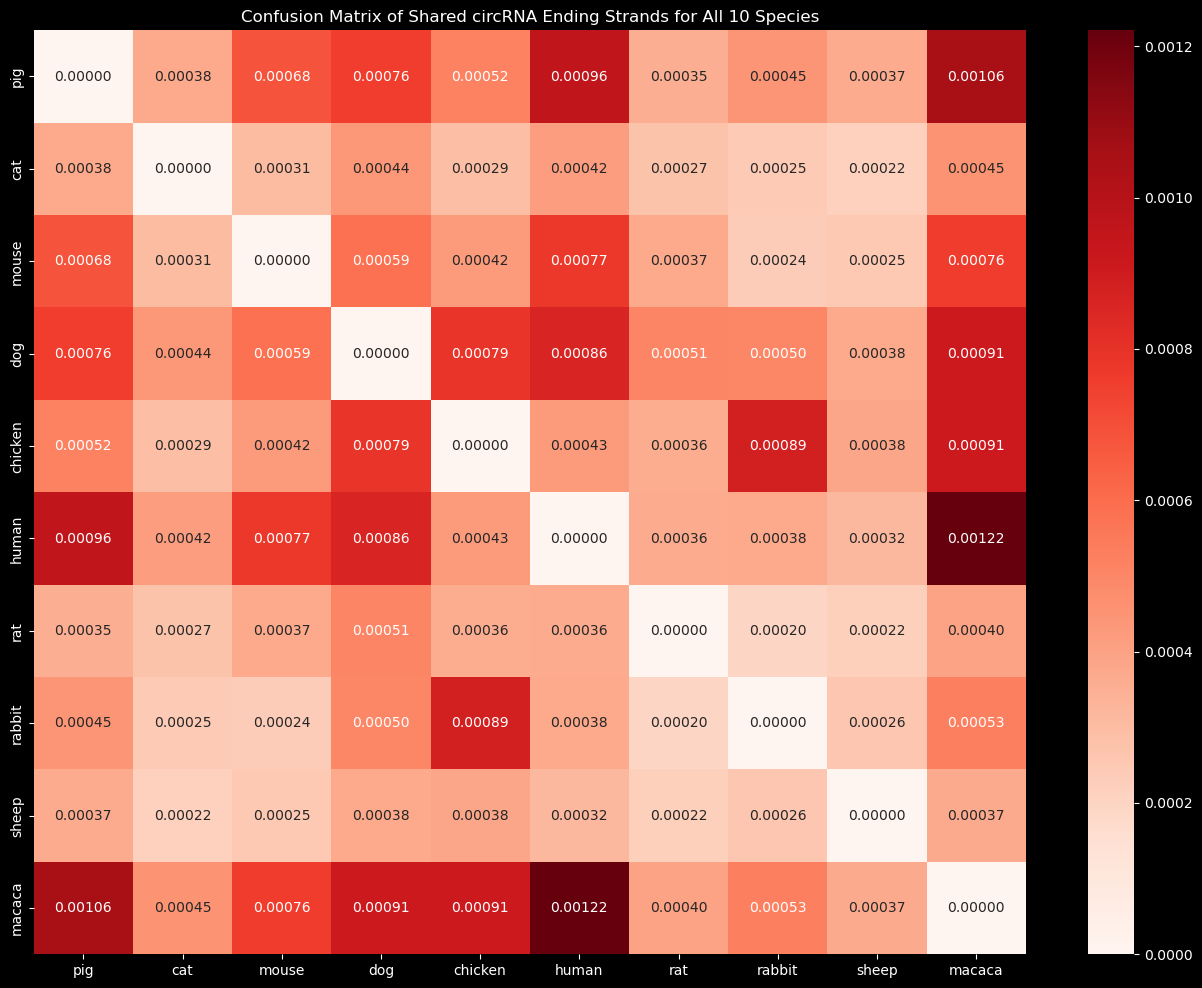

In [15]:
conf_mtx = pd.DataFrame(np.zeros((len(species), len(species)), dtype = int), index = species, columns = species)

for (species1, species2), count in shared_results.items():
    conf_mtx.loc[species1, species2] = count / (len(set(dfs[species1]['End'])) + len(set(dfs[species2]['End'])))
    conf_mtx.loc[species2, species1] = count / (len(set(dfs[species1]['End'])) + len(set(dfs[species2]['End'])))

plt.figure(figsize = (16, 12))
plt.title("Confusion Matrix of Shared circRNA Ending Strands for All 10 Species")
sns.heatmap(conf_mtx, annot = True, fmt = '.5f', cmap = 'Reds')

## Sequence Data

In [16]:
dfs_seq = {}
path = 'sequence_data'

for file_name in os.listdir(path):
    file_path = os.path.join(path, file_name)
    id = file_name.split('_')[0]
    dfs_seq[id] = pd.read_csv(file_path, on_bad_lines = 'warn', delim_whitespace = True, header = None)

### Computing Percentage of Unknown Entries in Each Species Dataset

In [17]:
for key in dfs_seq.keys():
    result = (dfs_seq[key][1] == 'unknown').sum().sum() / len(dfs_seq[key])
    print(f'Percentage of unknown entries in {key} sequence data: {result}')

Percentage of unknown entries in human sequence data: 0.15898338851422522
Percentage of unknown entries in cat sequence data: 0.07806097817610141
Percentage of unknown entries in rabbit sequence data: 0.11166017687434002
Percentage of unknown entries in sheep sequence data: 0.06232478273058593
Percentage of unknown entries in dog sequence data: 0.11182766917880214
Percentage of unknown entries in chicken sequence data: 0.08455338523815364
Percentage of unknown entries in macaca sequence data: 0.15624748463953209
Percentage of unknown entries in rat sequence data: 0.12428483480402217
Percentage of unknown entries in pig sequence data: 0.07362637362637363
Percentage of unknown entries in mouse sequence data: 0.10295687242512212


### Displaying The 10 Most Frequent Sequences for Each Species

In [18]:
for key in dfs_seq.keys():
    print(f'SPECIES: {key}: \n {dfs_seq[key][1].value_counts()[1:10]}')

SPECIES: human: 
 1
GATGGCCCCGAAGCCGGACAGACTGTGAAG                                                                                                                                 13
ATATGAATTGAGAATTCGTTATTTGCCAAAAGGATTTCTAAACCAGTTTACTGAAGATAAGCCAACTTTGAATTTCTTCTATCAACAG                                                                       11
CGTCTGGATGGTTCCATCAAGGGAGAAATCCGAAAACAGGCACTGGACCACTTCAATGCAGATGGGTCTGAG                                                                                       11
AATTCCTAGAGGACCTGTGCAACAACCTCTTGAGGATCGAATCTTCACTCCCGCTGTCTCAGCAGTCTACAGCACG                                                                                   11
GCAAAGGCAGCTCGAGCATCTCATCTGACGTGAGTTCAAGTACAGATCACACGCCCACTAAAGCCCAGAAGAATGTGGCTACCAGCGAAG                                                                     11
ATGAGTGTAAGGCCATTATCATGGACTTTTTCCCCAGCTGCAG                                                                                                                    11
TTATTTCT

In [19]:
shared_results = {}
for species1, species2 in itertools.combinations(dfs.keys(), 2):
    set1 = set(dfs_seq[species1][1])
    set2 = set(dfs_seq[species2][1])
    shared_seqs = set1 & set2
    count = len(shared_seqs)
    shared_results[(species1, species2)] = count

<Axes: title={'center': 'Confusion Matrix of Shared circRNA Sequences for All 10 Species'}>

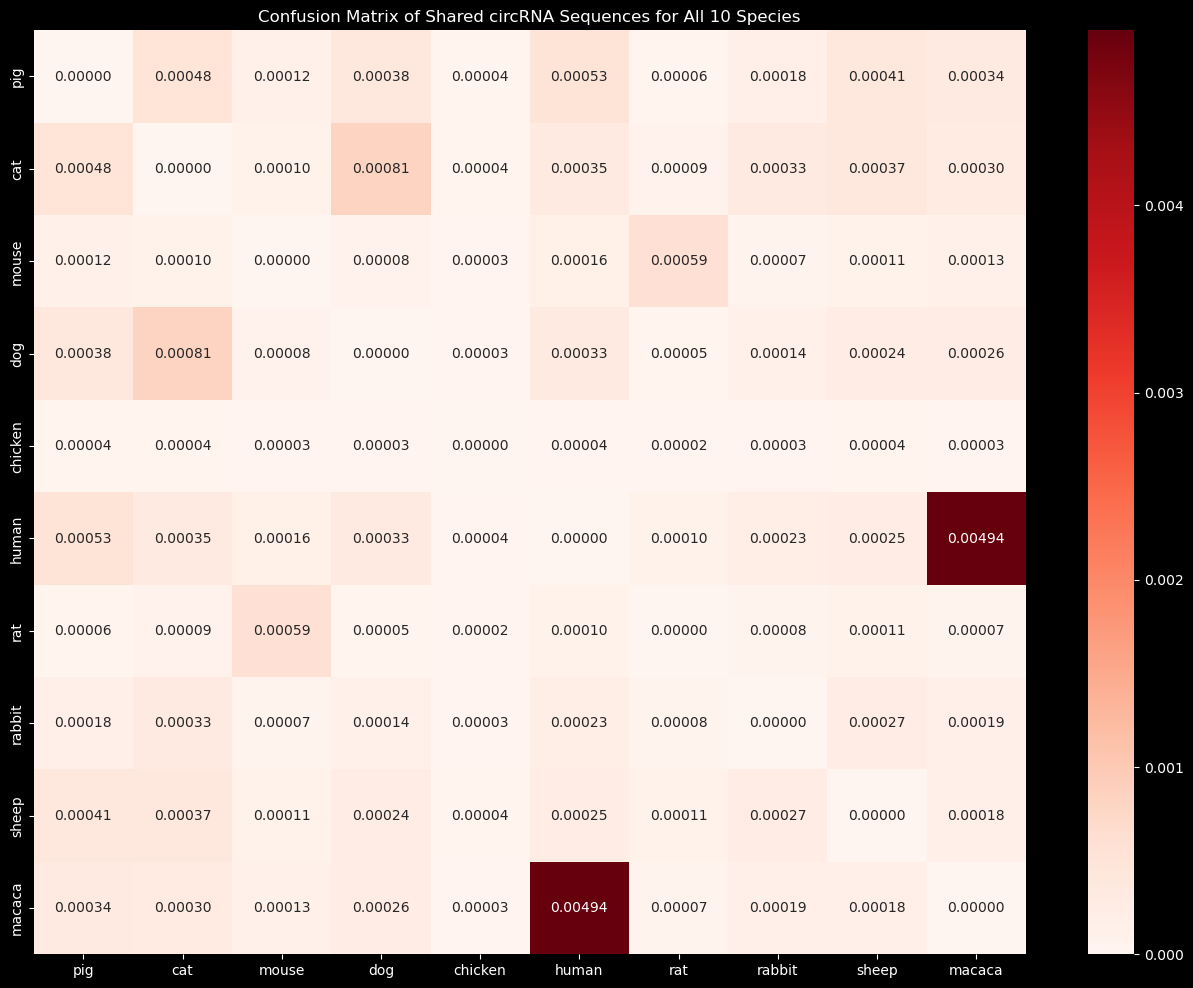

In [20]:
conf_mtx = pd.DataFrame(np.zeros((len(species), len(species)), dtype = int), index = species, columns = species)

for (species1, species2), count in shared_results.items():
    conf_mtx.loc[species1, species2] = count / (len(set(dfs_seq[species1][1])) + len(set(dfs_seq[species2][1])))
    conf_mtx.loc[species2, species1] = count / (len(set(dfs_seq[species1][1])) + len(set(dfs_seq[species2][1])))

plt.figure(figsize = (16, 12))
plt.title("Confusion Matrix of Shared circRNA Sequences for All 10 Species")
sns.heatmap(conf_mtx, annot = True, fmt = '.5f', cmap = 'Reds')